# Optimization

## Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("./Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(labels=["EIN", "NAME"], axis=1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_type_counts = application_df["APPLICATION_TYPE"].value_counts()
application_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

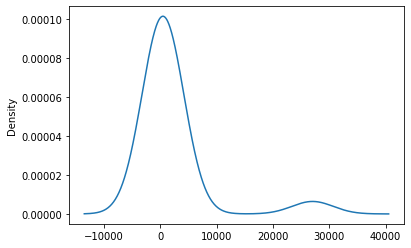

In [5]:
# Visualize the value counts of APPLICATION_TYPE
application_type_counts.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_type_counts[application_type_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df["APPLICATION_TYPE"] = application_df["APPLICATION_TYPE"].replace(app,"Other")
    
# Check to make sure binning was successful
application_df["APPLICATION_TYPE"].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df["CLASSIFICATION"].value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

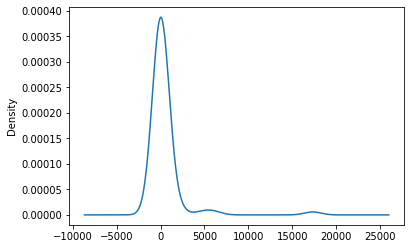

In [8]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [9]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts < 1800].index)

# Replace in dataframe
for cls in replace_class:
    application_df["CLASSIFICATION"] = application_df["CLASSIFICATION"].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df["CLASSIFICATION"].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

## Optimization #1  Data Binning/Bucketing - INCOME and AFFILIATION

In [10]:
# Income column
income_counts = application_df["INCOME_AMT"].value_counts()
income_counts

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

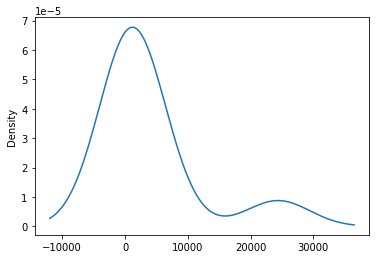

In [11]:
# Plot
income_counts.plot.density()

In [12]:
# Other
replace_income = list(income_counts[income_counts < 3000].index)

# DF
for income in replace_income:
    application_df["INCOME_AMT"] = application_df["INCOME_AMT"].replace(income, "Other")
    
# Check
application_df["INCOME_AMT"].value_counts()

0                24388
25000-99999       3747
100000-499999     3374
Other             2790
Name: INCOME_AMT, dtype: int64

In [13]:
# Affiliation
affiliation_counts = application_df["AFFILIATION"].value_counts()
affiliation_counts

Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64

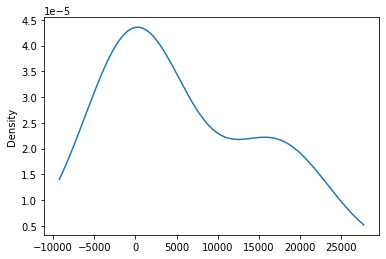

In [14]:
# Plot
affiliation_counts.plot.density()

In [15]:
# Other
replace_affiliation = list(affiliation_counts[affiliation_counts < 15000].index)

# DF
for affiliation in replace_affiliation:
    application_df["AFFILIATION"] = application_df["AFFILIATION"].replace(affiliation, "Other")
    
# Check
application_df["AFFILIATION"].value_counts()

Independent         18480
CompanySponsored    15705
Other                 114
Name: AFFILIATION, dtype: int64

In [16]:
# Generate our categorical variable lists
application_cat = list(application_df.dtypes[application_df.dtypes == "object"].index)
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [17]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Independent,AFFILIATION_Other,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_100000-499999,INCOME_AMT_25000-99999,INCOME_AMT_Other,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [18]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(labels=application_cat, axis=1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Independent,AFFILIATION_Other,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_100000-499999,INCOME_AMT_25000-99999,INCOME_AMT_Other,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [19]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values.reshape(-1, 1)
X = application_df.drop("IS_SUCCESSFUL", axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [20]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Optimization #2 -  Epochs 50

In [21]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                2880      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,341
Trainable params: 5,341
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [23]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=50)

Epoch 1/50
804/804 [==============================] - 4s 4ms/step - loss: 0.6954 - accuracy: 0.5354
Epoch 2/50
804/804 [==============================] - 4s 4ms/step - loss: 0.6908 - accuracy: 0.5354
Epoch 3/50
804/804 [==============================] - 4s 5ms/step - loss: 0.6911 - accuracy: 0.5354
Epoch 4/50
804/804 [==============================] - 3s 4ms/step - loss: 0.6911 - accuracy: 0.5335
Epoch 5/50
804/804 [==============================] - 3s 4ms/step - loss: 0.6910 - accuracy: 0.5354
Epoch 6/50
804/804 [==============================] - 2s 2ms/step - loss: 0.6910 - accuracy: 0.5354
Epoch 7/50
804/804 [==============================] - 2s 2ms/step - loss: 0.6910 - accuracy: 0.5340
Epoch 8/50
804/804 [==============================] - 1s 2ms/step - loss: 0.6912 - accuracy: 0.5354
Epoch 9/50
804/804 [==============================] - 1s 2ms/step - loss: 0.6909 - accuracy: 0.5354
Epoch 10/50
804/804 [==============================] - 1s 2ms/step - loss: 0.6910 - accuracy: 0.5354

In [24]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.7918 - accuracy: 0.4769 - 454ms/epoch - 2ms/step
Loss: 0.7917860150337219, Accuracy: 0.47685131430625916


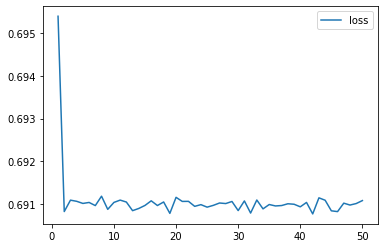

In [25]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

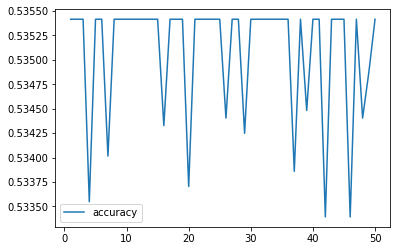

In [26]:
# Plot the accuracy
history_df.plot(y="accuracy")

## Optimization #3 - Changed the activation to "TANH"

In [45]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn2 = tf.keras.models.Sequential()

# First hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh"))

# Second hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Output layer
nn2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 80)                2880      
                                                                 
 dense_14 (Dense)            (None, 30)                2430      
                                                                 
 dense_15 (Dense)            (None, 1)                 31        
                                                                 
Total params: 5,341
Trainable params: 5,341
Non-trainable params: 0
_________________________________________________________________


In [46]:
# Compile the model
nn2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [47]:
# Train the model
fit_model2 = nn2.fit(X_train,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6925 - accuracy: 0.5283
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6915 - accuracy: 0.5315
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6914 - accuracy: 0.5343
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6914 - accuracy: 0.5349
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6909 - accuracy: 0.5336
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6914 - accuracy: 0.5328
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6913 - accuracy: 0.5349
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6913 - accuracy: 0.5342
Epoch 9/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6913 - accuracy: 0.5346
Epoch 10/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6914 - accura

In [48]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.7918 - accuracy: 0.4769 - 292ms/epoch - 1ms/step
Loss: 0.7917860150337219, Accuracy: 0.47685131430625916


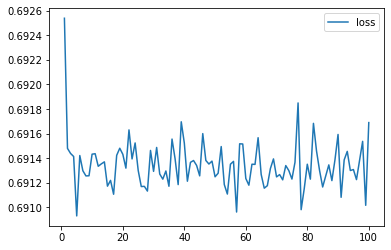

In [49]:
# Create a DataFrame containing training history
history_df2 = pd.DataFrame(fit_model2.history, index=range(1,len(fit_model2.history["loss"])+1))

# Plot the loss
history_df2.plot(y="loss")

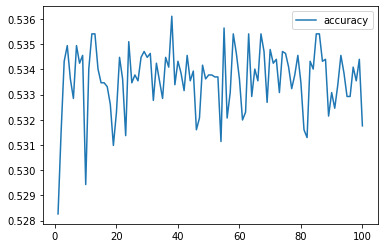

In [50]:
# Plot the accuracy
history_df2.plot(y="accuracy")

## Optimization #4 - Added Hidden Layer

In [33]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 180
hidden_nodes_layer2 = 100
hidden_nodes_layer3 = 50

nn3 = tf.keras.models.Sequential()

# First hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 180)               6480      
                                                                 
 dense_7 (Dense)             (None, 100)               18100     
                                                                 
 dense_8 (Dense)             (None, 50)                5050      
                                                                 
 dense_9 (Dense)             (None, 1)                 51        
                                                                 
Total params: 29,681
Trainable params: 29,681
Non-trainable params: 0
_________________________________________________________________


In [34]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [35]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=5)

In [36]:
# Compile the model
nn3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [37]:
# Train the model
fit_model3 = nn3.fit(X_train,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 3s 2ms/step - loss: 45689.2266 - accuracy: 0.4850
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 30793.0586 - accuracy: 0.4941
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 13829.3711 - accuracy: 0.4811
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 13748.9297 - accuracy: 0.4873
Epoch 5/100
801/804 [============================>.] - ETA: 0s - loss: 181.7693 - accuracy: 0.5268
Epoch 5: saving model to checkpoints/weights.05.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 181.1220 - accuracy: 0.5269
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.7038 - accuracy: 0.5354
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6907 - accuracy: 0.5354
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6907 - accuracy: 0.5354
Epoch 9/100
804/804 [=============

In [38]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.7918 - accuracy: 0.4769 - 311ms/epoch - 1ms/step
Loss: 0.7917860150337219, Accuracy: 0.47685131430625916


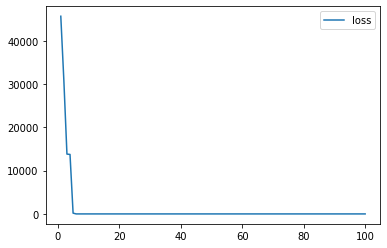

In [39]:
# Create a DataFrame containing training history
history_df3 = pd.DataFrame(fit_model3.history, index=range(1,len(fit_model3.history["loss"])+1))

# Plot the loss
history_df3.plot(y="loss")

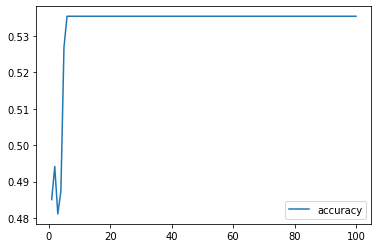

In [40]:
# Plot the accuracy
history_df3.plot(y="accuracy")

In [41]:
# Export and save model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")